In [60]:
import keras
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPooling2D,  Conv2DTranspose, UpSampling2D
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [61]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
img_h, img_w = 28, 28 
channel = 1

In [62]:
X_train = X_train.reshape(X_train.shape[0], img_h, img_w, channel)
X_test = X_test.reshape(X_test.shape[0], img_h, img_w, channel)
input_shape = (img_h, img_w, channel)

In [63]:
X_train = X_train/255
X_test  = X_test/255

In [64]:
input_layer = Input(input_shape)

x = Conv2D(filters=8, kernel_size=5, activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, 2, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
encoded = x

x = UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=16, kernel_size=2, activation='relu')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2DTranspose(filters=8, kernel_size= 5, activation='relu')(x)
x = Conv2DTranspose(channel, 3, activation='sigmoid')(x)

model = Model(inputs= input_layer, outputs=x)

In [65]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 16)        528       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 11, 11, 16)      

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x=X_train, y=X_train, batch_size=32, epochs=1, validation_data=(X_test, X_test))

1875/1875 [==============================] - 86s 46ms/step - loss: 0.1069 - val_loss: 0.0776


In [67]:
#model.save('encoder_weights.h5')
#model.load_weights('encoder_weights.h5)

In [74]:
sample = X_test[356]
pred = model.predict(np.array([sample]))[0]
y_img = sample.reshape(28, 28)
pred_img = pred.reshape(28, 28) 

Input Image / Target Image


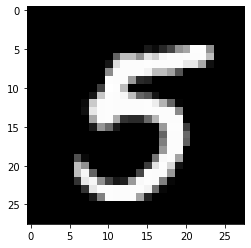

In [77]:
print('Input Image / Target Image')
plt.imshow(y_img, cmap='gray')

Predicted Output Image


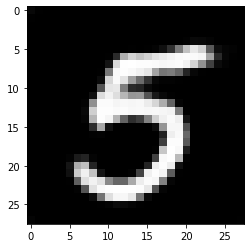

In [78]:
print('Predicted Output Image')
plt.imshow(pred_img, cmap='gray')